In [362]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
completedataset2019 = pd.read_excel('D:\Python lecture\enddataproject\\featuredata\completedataset2019.xlsx',index_col=0)
completedataset2020 = pd.read_excel('D:\Python lecture\enddataproject\\featuredata\completedataset2020.xlsx',index_col=0)
completedataset2021 = pd.read_excel('D:\Python lecture\enddataproject\\featuredata\completedataset2021.xlsx',index_col=0)

In [374]:
#แก้หน่วยของ 'dividendYeild' ให้ตรงกับ 'earningYeild' 
completedataset2021['dividendYeild'] = completedataset2021['dividendYeild'] /100
completedataset2020['dividendYeild'] = completedataset2020['dividendYeild'] /100
completedataset2019['dividendYeild'] = completedataset2019['dividendYeild'] /100

In [376]:
indices_2019 = completedataset2019.index.tolist()
indices_2020 = completedataset2020.index.tolist()
indices_2021 = completedataset2021.index.tolist()

def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

indices = intersection(indices_2019, indices_2020)
indices = intersection(indices, indices_2021)

completedataset2019 = completedataset2019.loc[indices]
completedataset2020 = completedataset2020.loc[indices]
completedataset2021 = completedataset2021.loc[indices]

In [377]:
len(indices)

68

In [378]:
completedataset2019.sort_index(inplace=True)
completedataset2020.sort_index(inplace=True)
completedataset2021.sort_index(inplace=True)

In [379]:
completedataset2021.index

Index(['ADVANC', 'AMATA', 'AP', 'BANPU', 'BBL', 'BCH', 'BCP', 'BCPG', 'BDMS',
       'BEM', 'BGRIM', 'BH', 'BLA', 'CBG', 'CHG', 'CK', 'CKP', 'COM7', 'CPALL',
       'CPF', 'CPN', 'DTAC', 'EA', 'EGCO', 'FORTH', 'GLOBAL', 'GPSC', 'GULF',
       'GUNKUL', 'HANA', 'HMPRO', 'INTUCH', 'IRPC', 'IVL', 'JMT', 'KBANK',
       'KCE', 'KKP', 'KTB', 'KTC', 'LH', 'MEGA', 'MTC', 'ORI', 'OSP', 'PLANB',
       'PTG', 'PTT', 'PTTEP', 'PTTGC', 'QH', 'RATCH', 'SAWAD', 'SCC', 'SPALI',
       'STA', 'STEC', 'SYNEX', 'TASCO', 'TCAP', 'THANI', 'TISCO', 'TOP', 'TQM',
       'TRUE', 'TTA', 'TTB', 'WHA'],
      dtype='object')

In [380]:
#ทำให้standardization ข้อมูลให้อยู่ในมาตรฐานเดียวกัน เพื่อนำไป train clustering model
data2019_std = (completedataset2019.loc[:,completedataset2019.columns[2:]] - completedataset2019.loc[:,completedataset2019.columns[2:]].mean())/completedataset2019.loc[:,completedataset2019.columns[2:]].std()
data2020_std = (completedataset2020.loc[:,completedataset2020.columns[2:]] - completedataset2020.loc[:,completedataset2020.columns[2:]].mean())/completedataset2020.loc[:,completedataset2020.columns[2:]].std()
data2021_std = (completedataset2021.loc[:,completedataset2021.columns[2:]] - completedataset2021.loc[:,completedataset2021.columns[2:]].mean())/completedataset2021.loc[:,completedataset2021.columns[2:]].std()

In [382]:
data2021_std

,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity
ADVANC,1.021217,0.218451,-0.525630,0.092906,-1.192855,1.018576,0.464168
AMATA,-0.386516,-0.645628,-0.221231,-0.354686,-0.122664,-0.312612,-0.462995
AP,-0.346963,1.125201,1.283764,-0.050816,2.378836,-0.588575,-0.673130
BANPU,-0.319995,-0.256259,1.271012,-0.131917,-0.719149,0.737066,0.440248
BBL,1.891387,-0.288262,0.691698,-0.862848,-1.528893,1.623490,2.483622
...,...,...,...,...,...,...,...
TQM,-0.339771,-0.202921,-0.916777,1.378195,1.061269,-1.331238,-0.823449
TRUE,-0.613048,-0.608291,-1.300387,-0.730418,-1.011339,1.535610,1.975289
TTA,-0.224707,-1.275019,2.439895,0.214044,1.164102,-1.058455,-0.754504
TTB,-0.586080,0.239787,0.050488,-0.877220,-1.434197,1.593597,2.280033


ใช้ clustering ในการเลือกหุ้นในปี2019 และจะดูรายชื่อหุ้นของเราที่ได้จากคลัสเตอร์ว่าในปี2020 มีการเติบโตจากต้นปีไปยังท้ายปีเป็นกี่ % 

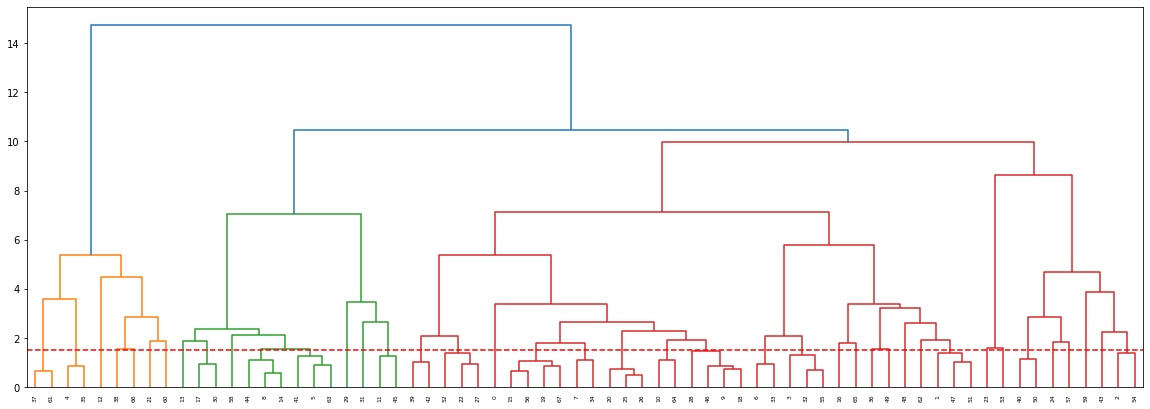

In [1201]:
#เริ่มจาก plot ดู dendogram จะตีเส้นปะสีแดงเพื่อกำหนดตัวแปรในคลัสเตอร์โดยดูว่า มีเส้น dendogram ที่ชนกับเส้นปะทั้งหมดกี่เส้น
fig,ax = plt.subplots(figsize=(20,7))
dendrogram_2019 = sch.dendrogram(sch.linkage(data2019_std, method='ward'),ax=ax)
plt.axhline(y=1.5, color='r', linestyle='--')

In [1525]:
data2019_std

,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity
ADVANC,1.368465,0.022236,-0.263058,1.162908,-0.973945,0.994361,0.496194
AMATA,-0.289700,-0.562357,0.537624,-0.077024,0.272992,-0.221468,-0.408296
AP,-0.411349,0.923300,1.806043,-0.263597,1.126490,-0.118767,-0.482121
BANPU,-0.615344,1.191422,-1.733708,-0.965189,-0.625747,0.528167,0.244081
BBL,2.916211,0.347498,1.446665,-1.122610,-1.297109,1.565004,2.175687
...,...,...,...,...,...,...,...
TQM,-0.278471,-1.239255,-0.857497,1.335877,0.230653,-0.680664,-0.695271
TRUE,-0.562942,-0.575544,-0.572117,-1.004059,-0.612972,0.989354,0.493336
TTA,-0.536740,-0.940365,0.254149,-1.202292,1.235788,-1.340031,-0.802582
TTB,-0.566685,-0.601916,0.743571,-1.355826,-1.189777,1.716413,3.192014


In [1202]:
# ควรจัด 40 cluster
hc_2019 = AgglomerativeClustering(n_clusters=40, affinity = 'euclidean', linkage = 'ward')
y_hc_2019 = hc_2019.fit_predict(data2019_std)

In [1203]:
#สร้างชุดข้อมูลเก็บเลขคลัสเตอร์ของปี2562
cluster2019 = completedataset2019.copy()
cluster2019['cluster2019'] = pd.Series(y_hc_2019, index=completedataset2019.index)

In [1204]:
#สร้างข้อมูลจำแนกกลุ่มหุ้นจาก cluster2019 
data_2019_clustered_2019 = cluster2019[['returnpct','volatility','cluster2019']].groupby('cluster2019').sum()
data_2019_clustered_2019['returnsTopricevol'] = data_2019_clustered_2019['returnpct'] / data_2019_clustered_2019['volatility']

In [1205]:
#ใส่ผลรวมจำนวนหุ้นในแต่ละคลัสเตอร์ โดยนับจาก cluster2019
num_of_stocks_2019 = []
for n in range(len(set(y_hc_2019))):
    num_of_stocks_2019.append(cluster2019['cluster2019'][cluster2019['cluster2019'] == n].count())

data_2019_clustered_2019['stockincluster'] = num_of_stocks_2019

In [1206]:
#เราจะเลือกกลุ่มหุ้น 3 กลุ่มแรก ที่มีค่าเปอร์เซ็นผลตอบแทนหารความผันผวนมากที่สุด ถ้าผลตอบแทนสูงกว่าความผันผวนมากๆ ก็เป็นไปได้ว่าจะสามารถเติบโตได้ดีโดยมีความเสี่ยงต่ำ
data_2019_clustered_2019.sort_values(by='returnsTopricevol',ascending=False,inplace=True)

In [1526]:
data_2019_clustered_2019

,returnpct,volatility,returnsTopricevol,stockincluster
cluster2019,,,,
21,81.119165,3.289765,24.658042,2
8,191.901374,8.885213,21.597836,3
10,88.439535,4.498195,19.661115,2
26,44.444443,2.697770,16.474510,1
18,114.814381,7.050727,16.284048,3
0,127.271233,9.390043,13.553850,4
32,170.400000,16.301215,10.453209,1
14,88.701442,8.958431,9.901449,2
2,165.881501,17.011469,9.751157,3


In [1532]:
cluster2019

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2019
ADVANC,23.342939,20.038441,10.49,0.0332,0.049249,14.54,0.447884,0.760436,3.180126,31
AMATA,-2.415459,1.791157,1.63,0.0199,0.081095,8.16,1.973421,0.533581,1.381830,1
AP,21.487598,0.528550,0.98,0.0537,0.131544,7.20,3.017615,0.552743,1.235053,6
BANPU,-20.805366,1.962247,-0.11,0.0598,-0.009244,3.59,0.873879,0.673451,2.678879,3
BBL,-21.428571,17.601105,18.76,0.0406,0.117250,2.78,0.052516,0.866910,6.519273,5
...,...,...,...,...,...,...,...,...,...,...
TQM,193.859659,5.525095,1.69,0.0045,0.025606,15.43,1.921622,0.447901,0.811270,8
TRUE,-9.411765,0.564992,0.17,0.0196,0.036957,3.39,0.889508,0.759502,3.174445,14
TTA,-15.728154,0.525184,0.31,0.0113,0.069820,2.37,3.151333,0.324873,0.597917,38
TTB,-19.477942,0.222026,0.15,0.0190,0.089286,1.58,0.183829,0.895161,8.539920,34


In [1426]:
#รายชื่อหุ้นทั้งหมดจาก กลุ่มหุ้นที่เราเลือก
cluster2019[(cluster2019['cluster2019'] == 8 )| (cluster2019['cluster2019'] == 10) | (cluster2019['cluster2019'] == 21) |(cluster2019['cluster2019'] == 26) 
|(cluster2019['cluster2019'] == 18) ].sort_values(by='cluster2019')

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2019
BCH,4.938267,0.745508,0.46,0.0135,0.026901,12.82,1.357361,0.505635,1.142343,8
MEGA,-6.896552,2.614610,1.31,0.0272,0.050385,13.53,1.738670,0.413722,0.705686,8
TQM,193.859659,5.525095,1.69,0.0045,0.025606,15.43,1.921622,0.447901,0.811270,8
BCPG,7.189539,1.312538,0.90,0.0395,0.055556,6.87,0.491838,0.581137,1.391836,10
JMT,81.249996,3.185658,0.77,0.0370,0.038500,11.30,0.526643,0.661468,1.975624,10
BDMS,6.122449,0.929042,0.99,0.0121,0.038077,15.58,0.847483,0.347744,0.554566,18
CHG,40.983599,0.266046,0.06,0.0194,0.023256,14.85,1.048699,0.378291,0.640181,18
OSP,67.708333,5.855638,1.08,0.0170,0.026667,16.74,1.776697,0.259035,0.352561,18
COM7,74.496649,2.294794,1.01,0.0189,0.038113,18.59,1.282016,0.631411,1.714249,21
HMPRO,6.622516,0.994971,0.47,0.0219,0.029375,14.99,0.703919,0.593881,1.462331,21


In [1507]:
cluster2019[(cluster2019['cluster2019'] == 21 )| (cluster2019['cluster2019'] == 8) | (cluster2019['cluster2019'] == 10) |(cluster2019['cluster2019'] == 26) 
|(cluster2019['cluster2019'] == 18)].drop('cluster2019',axis=1).agg(['mean','max','min'])

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity
mean,47.338082,2.401970,0.974545,0.020464,0.040530,14.208182,1.183325,0.480246,1.056551
max,193.859659,5.855638,1.980000,0.039500,0.093396,18.590000,1.921622,0.661468,1.975624
min,-6.896552,0.266046,0.060000,0.004500,0.023256,6.870000,0.491838,0.259035,0.352561


In [1345]:
# เราจะมาดู หุ้นกลุ่มที่ 6 8 10 ที่เราเลือกมา ว่าปีถัดมาถ้าซื้อหุ้นตั้งแต่ 2 ม.ค 63 และขายใน 29 ธ.ค 63 จะได้กำไรกี่เปอร์เซ็น
completedataset2020['cluster2019'] = pd.Series(y_hc_2019, index=completedataset2020.index) #ใส่เลขกลุ่มคลัสเตอร์ที่ได้จากโมเดล2019 ลงในdatasetปี2020
data_2020_clustered_2019 = completedataset2020.groupby('cluster2019').sum() #จัดกลุ่มหุ้น2020 ด้วยคลัสเตอร์ที่ได้จากโมเดล2019 
data_2020_clustered_2019['stockincluster'] = pd.Series(num_of_stocks_2019, index=data_2020_clustered_2019.index)
data_2020_clustered_2019 = data_2020_clustered_2019[['returnpct','dividendYeild','stockincluster']] #เราจะดูผลลัพธ์ของโมเดล ตัวแปรอื่นๆที่ใช้ในการTrainไม่มีความความแล้ว 

In [ ]:
data_2020_clustered_2019.sort_values(by='returnpct',ascending=False) #มาดูว่าแต่ละคลัสเตอร์ได้กำไรหรือขาดทุนเท่าไหร่

In [1528]:
#มาดูว่าหุ้นแต่ละตัวที่เราเลือกจากdataset2019 ตัวไหนได้กำไรหรือขาดทุนเท่าไหร่ในปี2563
completedataset2020[(completedataset2020['cluster2019'] == 21 )| (completedataset2020['cluster2019'] == 8) | (completedataset2020['cluster2019'] == 10) 
|(completedataset2020['cluster2019'] == 26) |(completedataset2020['cluster2019'] == 18)].sort_values(by='cluster2019')

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2019
BCH,-19.999998,1.134676,0.49,0.0169,0.036029,11.99,0.624346,0.538563,1.292902,8
MEGA,32.110092,5.351814,1.60,0.0201,0.044755,15.32,1.794122,0.396121,0.657968,8
TQM,101.526718,13.361828,2.34,0.0130,0.017398,18.92,3.488374,0.334737,0.503166,8
BCPG,-14.371260,1.804589,0.92,0.0341,0.064789,6.26,3.087681,0.559759,1.275378,10
JMT,77.230053,6.895875,1.15,0.0147,0.031944,12.48,1.487352,0.596750,1.487729,10
BDMS,-19.619046,2.103236,0.45,0.0264,0.021635,8.36,2.674854,0.327729,0.507194,18
CHG,-3.846150,0.130627,0.08,0.0203,0.032520,17.76,1.233658,0.323766,0.498849,18
OSP,-11.111111,3.553484,1.17,0.0282,0.032958,16.30,2.014193,0.252419,0.339491,18
COM7,59.000000,4.318826,1.24,0.0205,0.031795,20.43,1.322981,0.579565,1.385120,21
HMPRO,-13.207544,1.344021,0.39,0.0277,0.028467,12.30,0.767992,0.615530,1.600981,21


In [1527]:
completedataset2020['returnpct'][(completedataset2020['cluster2019'] == 21 )| (completedataset2020['cluster2019'] == 8) | (completedataset2020['cluster2019'] == 10) |
(completedataset2020['cluster2019'] == 26) |(completedataset2020['cluster2019'] == 18)].sum()

172.07193753434177

In [1447]:
#performance of the selected cluster in 2020
selected_cluster_2019_indices = data_2019_clustered_2019[:5].index 
perform_20_cluster_19 = data_2020_clustered_2019.loc[selected_cluster_2019_indices,['returnpct','dividendYeild','stockincluster']]
returns_cluster_20_19 = perform_20_cluster_19.sum(axis=0)

In [1448]:
perform_20_cluster_19 

,returnpct,dividendYeild,stockincluster
cluster2019,,,
21,45.792456,0.0482,2
8,113.636812,0.0500,3
10,62.858793,0.0488,2
26,-15.639816,0.0856,1
18,-34.576308,0.0749,3


In [1449]:
returns_cluster_20_19

returnpct         172.071938
dividendYeild       0.307500
stockincluster     11.000000
dtype: float64

In [1451]:
print(f'''หุ้นที่ได้จากการจัดกลุ่มด้วยข้อมูลปี 2562 
-----------------------
ผลตอบแทนปี 2563 = {returns_cluster_20_19[0].round(2)} %
จำนวนหุ้นในพอร์ต = {int(returns_cluster_20_19[2])} ตัว
กำไรเฉลี่ยต่อหุ้น =  {(returns_cluster_20_19[0]/returns_cluster_20_19[2]).round(2)} %

''')


หุ้นที่ได้จากการจัดกลุ่มด้วยข้อมูลปี 2562 
-----------------------
ผลตอบแทนปี 2563 = 172.07 %
จำนวนหุ้นในพอร์ต = 11 ตัว
กำไรเฉลี่ยต่อหุ้น =  15.64 %




In [1457]:
#สร้างพอร์ตหุ้นอีกอันเพื่อเปรียบเทียบคุณภาพ ด้วยการเลือกหุ้นที่มีความสามารถในการชำระหนี้สูงและมีความสามารถในการทำกำไรในปีที่ผ่านมาสูงที่สุด เลือกมา 11 อันดับแรกเพื่อให้จำนวนหุ้นเท่ากับ พอร์ตที่ได้จาก cluster
porttop_2019 = cluster2019.copy()
porttop_2019['returnsTopricevol'] = cluster2019['returnpct'] / cluster2019['volatility'] #คำนวณ ผลตอบแทนหารความผันผวน
porttop_2019 = porttop_2019.sort_values(by='returnpct',ascending=False).head(20) #
porttop_2019 = porttop_2019[(porttop_2019['currentRatio'] > 1)]
porttop_2019 = porttop_2019.sort_values(by='earningsYield',ascending=False).head(11)


In [1458]:
porttop_2019.sort_values(by='returnsTopricevol',ascending=False)

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2019,returnsTopricevol
CHG,40.983599,0.266046,0.06,0.0194,0.023256,14.85,1.048699,0.378291,0.640181,18,154.046761
TQM,193.859659,5.525095,1.69,0.0045,0.025606,15.43,1.921622,0.447901,0.811270,8,35.087119
COM7,74.496649,2.294794,1.01,0.0189,0.038113,18.59,1.282016,0.631411,1.714249,21,32.463322
TASCO,44.444443,2.697770,1.98,0.0141,0.093396,15.59,1.321621,0.462485,0.871414,26,16.474510
OSP,67.708333,5.855638,1.08,0.0170,0.026667,16.74,1.776697,0.259035,0.352561,18,11.562930
SAWAD,66.536321,6.897304,2.85,0.0002,0.041606,12.56,3.147077,0.555851,1.374233,2,9.646714
MTC,28.934010,5.558285,2.00,0.0041,0.031373,11.02,3.654724,0.741857,2.873824,13,5.205564
RATCH,36.945813,7.510033,4.11,0.0349,0.059782,8.20,2.703937,0.407221,0.686976,1,4.919527
GPSC,61.926591,12.724817,2.25,0.0077,0.026239,7.20,1.059083,0.562824,1.405854,11,4.866600
KTC,24.800000,5.230049,2.14,0.0208,0.054177,9.92,3.283542,0.768936,3.332413,13,4.741829


In [1459]:
#นำรายชื่อหุ้นที่เราคัดเลือกจาก11อันดับแรกไปตรวจสอบดูว่าปี 2563 ราคาเป็นยังไง
returns_top = completedataset2020.loc[porttop_2019.index]

In [1460]:
returns_top.sort_values(by='returnpct',ascending=False)


,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2019
TQM,101.526718,13.361828,2.34,0.0130,0.017398,18.92,3.488374,0.334737,0.503166,8
COM7,59.000000,4.318826,1.24,0.0205,0.031795,20.43,1.322981,0.579565,1.385120,21
KTC,48.407643,7.010144,2.07,0.0148,0.034790,9.42,2.738079,0.736749,2.959879,13
SAWAD,-1.102941,9.760329,3.32,0.0213,0.050494,14.13,3.843147,0.537183,1.265006,2
CHG,-3.846150,0.130627,0.08,0.0203,0.032520,17.76,1.233658,0.323766,0.498849,18
MTC,-6.225681,7.441874,2.46,0.0051,0.041695,11.98,3.245688,0.732173,2.733748,13
OSP,-11.111111,3.553484,1.17,0.0282,0.032958,16.30,2.014193,0.252419,0.339491,18
GPSC,-12.173913,10.347244,2.66,0.0144,0.036068,5.31,1.969541,0.564136,1.407065,11
TASCO,-15.639816,3.657395,2.28,0.0856,0.130286,19.25,1.877883,0.295945,0.425535,26
RATCH,-22.939068,6.892702,4.34,0.0453,0.081887,7.41,2.687827,0.460266,0.852775,1


In [1461]:
print(f''' หุ้นที่ได้จากการ clustering ด้วยข้อมูลปี 2562
ความเติบโตของพอร์ตปี 2563 = {returns_cluster_20_19[0].round(2)} %
จำนวนหุ้นในพอร์ต = {int(returns_cluster_20_19[2])} ตัว
กำไรเฉลี่ยต่อหุ้น =  {(returns_cluster_20_19[0]/returns_cluster_20_19[2]).round(2)} %
-----------------------
หุ้นที่ได้จากการเลือกหุ้นดีความสามารถในการชำระหนี้สูงราคาถูกคุ้มค่า 10 อันดับแรก ด้วยข้อมูลปี 2562
ความเติบโตของพอร์ตปี 2563 = {returns_top['returnpct'].sum().round(2)} %
จำนวนหุ้นในพอร์ต = {len(returns_top.index)} ตัว
กำไรเฉลี่ยต่อหุ้น =  {(returns_top['returnpct'].sum().round(2)/len(returns_top.index)).round(2)} %

''')

 หุ้นที่ได้จากการ clustering ด้วยข้อมูลปี 2562
ความเติบโตของพอร์ตปี 2563 = 172.07 %
จำนวนหุ้นในพอร์ต = 11 ตัว
กำไรเฉลี่ยต่อหุ้น =  15.64 %
-----------------------
หุ้นที่ได้จากการเลือกหุ้นดีความสามารถในการชำระหนี้สูงราคาถูกคุ้มค่า 10 อันดับแรก ด้วยข้อมูลปี 2562
ความเติบโตของพอร์ตปี 2563 = 94.96 %
จำนวนหุ้นในพอร์ต = 11 ตัว
กำไรเฉลี่ยต่อหุ้น =  8.63 %




ใช้ clustering ในการเลือกหุ้นในปี2020 และจะดูรายชื่อหุ้นของเราที่ได้จากคลัสเตอร์ว่าในปี2021 มีการเติบโตจากต้นปีไปยังท้ายปีเป็นกี่ % 

In [ ]:

data2020_std.drop(['cluster2019'],axis=1,inplace=True)

In [964]:
data2020_std

,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity
ADVANC,1.497951,0.118822,0.058075,0.665834,-1.017407,1.070185,0.621395
AMATA,-0.307169,-0.394136,0.200694,-0.375945,0.773544,-0.262160,-0.454237
AP,-0.236811,0.548942,1.921253,0.200946,1.694753,-0.433129,-0.628334
BANPU,-0.608389,0.545756,-1.127820,-0.876121,-0.802248,0.622306,0.397240
BBL,1.447381,0.673199,0.388901,-0.929821,-1.341380,1.594299,2.467187
...,...,...,...,...,...,...,...
TQM,-0.016943,-0.795581,-0.435154,1.724490,1.469176,-1.322546,-0.867664
TRUE,-0.524839,-0.375020,-0.557272,-0.656719,-0.899107,1.483132,1.867653
TTA,-0.766694,-0.872047,-3.345352,-2.565368,0.454101,-1.073380,-0.758370
TTB,-0.509448,-0.260321,0.623138,-0.920616,-1.243572,1.618533,2.620387


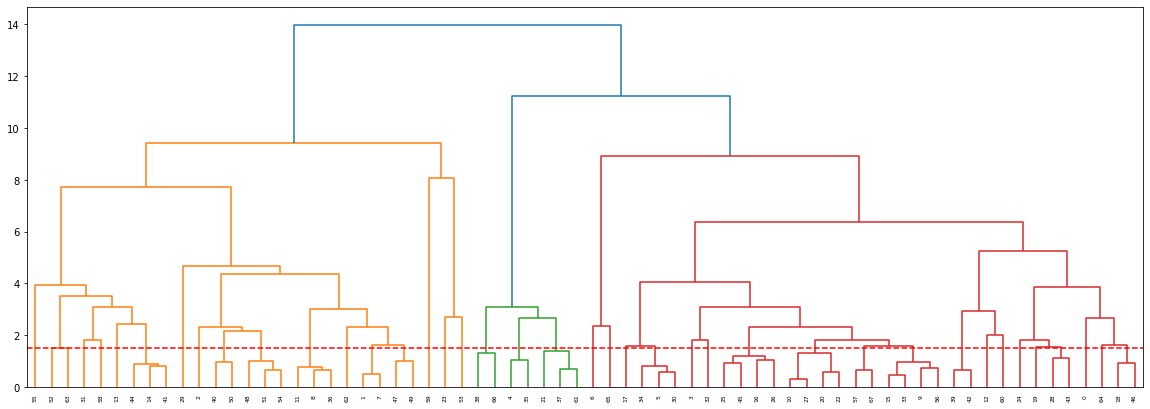

In [1223]:
#เริ่มจาก plot ดู dendogram จะตีเส้นปะสีแดงเพื่อกำหนดตัวแปรในคลัสเตอร์โดยดูว่า มีเส้น dendogram ที่ชนกับเส้นปะทั้งหมดกี่เส้น
fig,ax = plt.subplots(figsize=(20,7))
dendrogram_2020 = sch.dendrogram(sch.linkage(data2020_std, method='ward'),ax=ax)
plt.axhline(y=1.5, color='r', linestyle='--')

In [1224]:

hc_2020 = AgglomerativeClustering(n_clusters=40, affinity = 'euclidean', linkage = 'ward')
y_hc_2020 = hc_2020.fit_predict(data2020_std)

In [1225]:

cluster2020 = completedataset2020.copy()
cluster2020['cluster2020'] = pd.Series(y_hc_2020, index=completedataset2020.index)

In [1226]:
cluster2020

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2019,cluster2020
ADVANC,-18.119266,12.596826,9.23,0.0417,0.052443,12.02,0.449354,0.783850,3.632434,31,22
AMATA,-20.098041,2.340912,1.02,0.0256,0.062577,5.23,2.638196,0.533770,1.371986,1,35
AP,-5.161292,1.014864,1.34,0.0552,0.184828,8.99,3.764067,0.501680,1.006120,6,26
BANPU,-6.611572,1.955416,-0.35,0.0551,-0.031818,1.97,0.712315,0.699784,3.161372,3,32
BBL,-25.993884,18.201339,9.00,0.0591,0.075949,1.62,0.053404,0.882226,7.511380,5,4
...,...,...,...,...,...,...,...,...,...,...,...
TQM,101.526718,13.361828,2.34,0.0130,0.017398,18.92,3.488374,0.334737,0.503166,8,15
TRUE,-18.695650,0.368855,0.03,0.0262,0.008721,3.40,0.593936,0.861360,6.251456,14,34
TTA,28.888893,0.668585,-1.07,0.0106,-0.189381,-9.04,2.247783,0.381505,0.732847,38,10
TTB,-33.333331,0.218815,0.10,0.0298,0.092593,1.68,0.172942,0.886774,7.833333,34,3


In [1227]:

data_2020_clustered_2020 = cluster2020[['returnpct','volatility','cluster2020']].groupby('cluster2020').sum()
data_2020_clustered_2020['returnsTopricevol'] = data_2020_clustered_2020['returnpct'] / data_2020_clustered_2020['volatility']

In [1228]:

num_of_stocks_2020 = []
for n in range(len(set(y_hc_2020))):
    num_of_stocks_2020.append(cluster2020['cluster2020'][cluster2020['cluster2020'] == n].count())

data_2020_clustered_2020['stockincluster'] = num_of_stocks_2020

In [1430]:
data_2020_clustered_2020.sort_values(by='returnsTopricevol', ascending=False,inplace=True)
data_2020_clustered_2020

,returnpct,volatility,returnsTopricevol,stockincluster
cluster2020,,,,
10,28.888893,0.668585,43.209016,1
12,152.427180,7.951618,19.169329,1
36,79.112955,4.214351,18.772276,2
37,59.000000,4.318826,13.661120,1
30,4.385965,0.334211,13.123344,1
15,101.526718,13.361828,7.598266,1
33,44.022512,9.374572,4.695949,3
9,42.181962,14.452018,2.918759,2
39,17.293233,7.062793,2.448498,1


In [1431]:
cluster2020[(cluster2020['cluster2020'] == 10 )| (cluster2020['cluster2020'] == 12) | (cluster2020['cluster2020'] == 36) |(cluster2020['cluster2020'] == 30)|
(cluster2020['cluster2020'] == 33)|(cluster2020['cluster2020'] == 37) |(cluster2020['cluster2020'] == 15)].sort_values(by='cluster2020')

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2019,cluster2020
TTA,28.888893,0.668585,-1.07,0.0106,-0.189381,-9.04,2.247783,0.381505,0.732847,38,10
STA,152.427180,7.951618,6.21,0.0132,0.234340,23.45,1.769720,0.426562,1.043315,3,12
TQM,101.526718,13.361828,2.34,0.0130,0.017398,18.92,3.488374,0.334737,0.503166,8,15
FORTH,4.385965,0.334211,0.47,0.0693,0.077049,10.77,0.838972,0.715149,4.328542,33,30
BCH,-19.999998,1.134676,0.49,0.0169,0.036029,11.99,0.624346,0.538563,1.292902,8,33
HMPRO,-13.207544,1.344021,0.39,0.0277,0.028467,12.30,0.767992,0.615530,1.600981,21,33
JMT,77.230053,6.895875,1.15,0.0147,0.031944,12.48,1.487352,0.596750,1.487729,10,33
SYNEX,102.702700,3.833003,0.76,0.0313,0.050667,7.95,1.446896,0.609363,1.559923,17,36
WHA,-23.589745,0.381348,0.17,0.0440,0.055921,5.18,1.180466,0.610666,1.751558,16,36
COM7,59.000000,4.318826,1.24,0.0205,0.031795,20.43,1.322981,0.579565,1.385120,21,37


In [1232]:

completedataset2021['cluster2020'] = pd.Series(y_hc_2020, index=completedataset2021.index) 
data_2021_clustered_2020 = completedataset2021.groupby('cluster2020').sum() 
data_2021_clustered_2020['stockincluster'] = pd.Series(num_of_stocks_2020, index=data_2021_clustered_2020.index)
data_2021_clustered_2020 = data_2021_clustered_2020[['returnpct','stockincluster']] 

In [ ]:

data_2021_clustered_2020.sort_values(by='returnpct', ascending=False)

In [1234]:
cluster2020[cluster2020['cluster2020'] == 30 ]

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2019,cluster2020
FORTH,4.385965,0.334211,0.47,0.0693,0.077049,10.77,0.838972,0.715149,4.328542,33,30


In [1432]:

completedataset2021[(completedataset2021['cluster2020'] == 10 )| (completedataset2021['cluster2020'] == 12) | (completedataset2021['cluster2020'] == 36) |(completedataset2021['cluster2020'] == 30)|
(completedataset2021['cluster2020'] == 33)|(completedataset2021['cluster2020'] == 37) |(completedataset2021['cluster2020'] == 15)].sort_values(by='cluster2020')

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2020
TTA,50.393706,3.830547,2.12,0.0021,0.221990,12.09,2.834695,0.373502,0.684052,10
STA,19.047619,6.802107,10.32,0.0726,0.332903,28.46,2.200138,0.432024,1.060584,12
TQM,-25.576923,3.764352,1.48,0.0222,0.015258,23.43,2.727909,0.321389,0.532740,15
FORTH,245.454528,5.251007,0.77,0.0151,0.036321,13.99,1.017452,0.703014,3.640354,30
BCH,47.101442,3.552220,2.75,0.0114,0.136816,44.30,1.725549,0.457786,0.930538,33
HMPRO,5.035977,0.552599,0.41,0.0207,0.028276,12.28,0.922456,0.609287,1.559425,33
JMT,87.500000,6.890693,1.29,0.0091,0.018832,9.29,2.819938,0.319536,0.470708,33
SYNEX,135.000000,4.117165,1.02,0.0148,0.027945,10.53,1.375014,0.650833,1.871718,36
WHA,15.231789,0.160428,0.17,0.0285,0.048295,5.68,0.957458,0.588861,1.593108,36
COM7,113.548387,5.525152,2.19,0.0122,0.026789,25.67,1.218964,0.667992,2.018026,37


In [1433]:

selected_cluster_2020_indices = data_2020_clustered_2020[:7].index 
perform_21_cluster_20 = data_2021_clustered_2020.loc[selected_cluster_2020_indices,['returnpct','stockincluster']]
returns_cluster_21_20 = perform_21_cluster_20.sum(axis=0)

In [1434]:
returns_cluster_21_20

returnpct         692.736525
stockincluster     10.000000
dtype: float64

In [1411]:

porttop_2020 = cluster2020.copy()
porttop_2020['returnsTopricevol'] = cluster2020['returnpct'] / cluster2020['volatility'] 
porttop_2020 = porttop_2020.sort_values(by='returnpct',ascending=False).head(20) 
porttop_2020 = porttop_2020[(porttop_2020['currentRatio'] > 1)]
porttop_2020 = porttop_2020.sort_values(by='earningsYield',ascending=False).head(10)
returns2021_top2020 = completedataset2021.loc[porttop_2020.index]

In [1412]:
porttop_2020.sort_values(by='returnsTopricevol',ascending=False)

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2019,cluster2020,returnsTopricevol
SYNEX,102.702700,3.833003,0.76,0.0313,0.050667,7.95,1.446896,0.609363,1.559923,17,36,26.794320
STA,152.427180,7.951618,6.21,0.0132,0.234340,23.45,1.769720,0.426562,1.043315,3,12,19.169329
COM7,59.000000,4.318826,1.24,0.0205,0.031795,20.43,1.322981,0.579565,1.385120,21,37,13.661120
JMT,77.230053,6.895875,1.15,0.0147,0.031944,12.48,1.487352,0.596750,1.487729,10,33,11.199456
ORI,9.790207,1.295503,1.09,0.0655,0.144371,10.91,1.953420,0.643611,1.903883,25,6,7.557072
KTC,48.407643,7.010144,2.07,0.0148,0.034790,9.42,2.738079,0.736749,2.959879,13,9,6.905371
SPALI,9.042558,1.458821,2.13,0.0512,0.103902,9.07,2.612832,0.451726,0.842296,6,7,6.198537
MEGA,32.110092,5.351814,1.60,0.0201,0.044755,15.32,1.794122,0.396121,0.657968,8,16,5.999853
HANA,17.293233,7.062793,2.37,0.0327,0.059623,7.41,6.314761,0.141640,0.165013,29,39,2.448498
BLA,1.913874,2.682137,0.94,0.0305,0.044762,0.52,3.868110,0.864328,6.370750,23,29,0.713563


In [1413]:
returns2021_top2020['returnpct']

STA       19.047619
ORI       47.435894
SPALI      8.133975
HANA     120.370370
SYNEX    135.000000
BLA       57.657652
MEGA      33.333333
KTC       -2.834008
JMT       87.500000
COM7     113.548387
Name: returnpct, dtype: float64

In [1414]:

returns2021_top2020['returnpct'].sum()

619.193222911801

In [1435]:
print(f''' หุ้นที่ได้จากการ clustering ด้วยข้อมูลปี 2563
ผลตอบแทนปี 2564 = {returns_cluster_21_20[0].round(2)} %
จำนวนหุ้นในพอร์ต = {int(returns_cluster_21_20[1])} ตัว
กำไรเฉลี่ยต่อหุ้น =  {(returns_cluster_21_20[0]/returns_cluster_21_20[1]).round(2)} %
-----------------------
หุ้นที่ได้จากการเลือก 10 อันดับแรก ด้วยข้อมูลปี 2563
ผลตอบแทนปี 2564 = {returns2021_top2020['returnpct'].sum().round(2)} %
จำนวนหุ้นในพอร์ต = {len(returns2021_top2020.index)} ตัว
กำไรเฉลี่ยต่อหุ้น =  {(returns2021_top2020['returnpct'].sum().round(2)/len(returns2021_top2020.index)).round(2)} %
''')

 หุ้นที่ได้จากการ clustering ด้วยข้อมูลปี 2563
ผลตอบแทนปี 2564 = 692.74 %
จำนวนหุ้นในพอร์ต = 10 ตัว
กำไรเฉลี่ยต่อหุ้น =  69.27 %
-----------------------
หุ้นที่ได้จากการเลือก 10 อันดับแรก ด้วยข้อมูลปี 2563
ผลตอบแทนปี 2564 = 619.19 %
จำนวนหุ้นในพอร์ต = 10 ตัว
กำไรเฉลี่ยต่อหุ้น =  61.92 %



# ใช้ clustering ในการเลือกหุ้นในปี2021 และจะดูรายชื่อหุ้นของเราที่ได้จากคลัสเตอร์ว่าในปี2022(ปัจจุบัน) มีการเติบโตจากต้นปีไปยังท้ายปีเป็นกี่ % 

In [566]:
import yfinance as yf

In [578]:
liststock = [x+'.BK' for x in completedataset2021.index]

In [580]:
#ดึงข้อมูลหุ้นปี 65 ตั้งแต่ 2 ม.ค. ถึง 23 พ.ย(หรือก็คือเมื่อวานของผมตอนนี้)
stock = yf.download(liststock, start="2022-01-02",end="2022-11-23")
dataclose2022 = stock.Close
dataclose2022 = dataclose2022.dropna(axis=1)
dataclose2022

[*********************100%***********************]  68 of 68 completed


,ADVANC.BK,AMATA.BK,AP.BK,BANPU.BK,BBL.BK,BCH.BK,BCP.BK,BCPG.BK,BDMS.BK,BEM.BK,...,TASCO.BK,TCAP.BK,THANI.BK,TISCO.BK,TOP.BK,TQM.BK,TRUE.BK,TTA.BK,TTB.BK,WHA.BK
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,228.0,21.100000,9.55,10.6,125.0,19.500000,25.50,12.00,22.400000,8.55,...,18.200001,38.50,4.46,98.50,50.00,47.625,4.72,10.10,1.47,3.56
2022-01-05,226.0,20.900000,9.55,10.9,126.5,19.600000,26.25,12.00,22.700001,8.55,...,18.200001,39.25,4.54,98.75,52.00,47.500,4.70,10.10,1.45,3.54
2022-01-06,221.0,20.799999,9.45,11.0,124.0,20.900000,25.50,12.00,22.400000,8.40,...,18.100000,38.75,4.56,97.75,51.50,46.875,4.64,9.90,1.41,3.48
2022-01-07,221.0,20.500000,9.65,11.2,124.5,20.500000,27.00,12.00,22.600000,8.30,...,18.100000,38.75,4.46,97.50,52.25,47.000,4.62,10.10,1.45,3.44
2022-01-10,219.0,20.500000,9.70,11.2,126.0,19.900000,27.00,12.00,22.700001,8.20,...,18.200001,39.75,4.54,98.00,52.00,46.875,4.58,10.50,1.44,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-16,187.5,19.100000,10.20,12.5,142.5,20.200001,32.00,9.70,30.250000,9.45,...,17.100000,41.00,4.20,97.50,54.25,38.750,4.86,8.15,1.37,3.78
2022-11-17,187.0,19.299999,10.20,12.5,143.0,19.799999,31.25,9.65,29.000000,9.45,...,17.200001,41.00,4.10,96.50,53.50,38.500,4.94,8.05,1.36,3.78
2022-11-18,190.0,19.100000,10.20,12.4,142.5,20.000000,31.50,9.80,29.250000,9.45,...,17.200001,41.00,4.08,96.50,54.50,38.250,4.94,8.05,1.36,3.82


In [582]:
#ทำความสะอาดคอลัมน์
for stockkey in dataclose2022:
    stocknamefixed = stockkey.split('.')[0] #โค้ดนี้จะแยกข้อความเป็น 2 ส่วน [0] หมายความว่าเลือกตัวแรก
    dataclose2022.rename(columns={stockkey:stocknamefixed},inplace=True)  #เปลี่ยนชื่อหุ้นโดยเอา .BK ออกจากชื่อ

In [590]:
dataclose2022

,ADVANC,AMATA,AP,BANPU,BBL,BCH,BCP,BCPG,BDMS,BEM,...,TASCO,TCAP,THANI,TISCO,TOP,TQM,TRUE,TTA,TTB,WHA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,228.0,21.100000,9.55,10.6,125.0,19.500000,25.50,12.00,22.400000,8.55,...,18.200001,38.50,4.46,98.50,50.00,47.625,4.72,10.10,1.47,3.56
2022-01-05,226.0,20.900000,9.55,10.9,126.5,19.600000,26.25,12.00,22.700001,8.55,...,18.200001,39.25,4.54,98.75,52.00,47.500,4.70,10.10,1.45,3.54
2022-01-06,221.0,20.799999,9.45,11.0,124.0,20.900000,25.50,12.00,22.400000,8.40,...,18.100000,38.75,4.56,97.75,51.50,46.875,4.64,9.90,1.41,3.48
2022-01-07,221.0,20.500000,9.65,11.2,124.5,20.500000,27.00,12.00,22.600000,8.30,...,18.100000,38.75,4.46,97.50,52.25,47.000,4.62,10.10,1.45,3.44
2022-01-10,219.0,20.500000,9.70,11.2,126.0,19.900000,27.00,12.00,22.700001,8.20,...,18.200001,39.75,4.54,98.00,52.00,46.875,4.58,10.50,1.44,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-16,187.5,19.100000,10.20,12.5,142.5,20.200001,32.00,9.70,30.250000,9.45,...,17.100000,41.00,4.20,97.50,54.25,38.750,4.86,8.15,1.37,3.78
2022-11-17,187.0,19.299999,10.20,12.5,143.0,19.799999,31.25,9.65,29.000000,9.45,...,17.200001,41.00,4.10,96.50,53.50,38.500,4.94,8.05,1.36,3.78
2022-11-18,190.0,19.100000,10.20,12.4,142.5,20.000000,31.50,9.80,29.250000,9.45,...,17.200001,41.00,4.08,96.50,54.50,38.250,4.94,8.05,1.36,3.82


In [591]:
return2022 = pd.DataFrame(index=dataclose2022.keys(),columns=['returnpct'])

In [592]:
for stockname in return2022.index:
    try:
        return2022.loc[stockname,['returnpct']] = (dataclose2022.loc['2022-11-22',stockname] / dataclose2022.loc['2022-01-04',stockname] - 1)*100
    except:
        return2022.loc[stockname,['returnpct']] = np.nan

In [1534]:
for stockname in return2022.index:
    try:
        return2022.loc[stockname,['volatility']] = dataclose2022[stockname].std()
    except:
        return2022.loc[stockname,['volatility']] = np.nan

In [1536]:
return2022['returnsTopricevol'] = return2022['returnpct']/ return2022['volatility']

In [1546]:
return2022.sort_values(by='returnsTopricevol',ascending=False).head(8)

,returnpct,cluster2021,volatility,returnsTopricevol
WHA,8.426965,18,0.244083,34.525055
BEM,10.526311,10,0.363455,28.961766
KTB,30.370373,13,1.383934,21.944956
BANPU,20.754714,12,1.032793,20.095722
BDMS,31.696431,7,2.467102,12.847635
AP,6.806279,30,0.586628,11.602375
LH,5.056189,9,0.437850,11.547756
BCP,20.588235,0,2.189987,9.401075


In [ ]:
return2022[return2022['returnpct'] < 0].sort_values(by='returnsTopricevol',ascending=False).head(30)

In [1558]:
copy_return2022 = return2022.copy()
copy_return2022['absreturnpct'] = abs(copy_return2022['returnpct'])
copy_return2022['absreturntovol'] = copy_return2022['absreturnpct'] / copy_return2022['volatility']

In [1561]:
copy_return2022.sort_values(by='absreturntovol',ascending=False).head()

,returnpct,cluster2021,volatility,returnsTopricevol,absreturnpct,absreturntovol
TTB,-6.802723,13,0.077524,-87.750072,6.802723,87.750072
IRPC,-23.076925,0,0.289067,-79.832534,23.076925,79.832534
THANI,-8.071752,27,0.194182,-41.567933,8.071752,41.567933
WHA,8.426965,18,0.244083,34.525055,8.426965,34.525055
QH,-2.631576,9,0.081175,-32.418719,2.631576,32.418719


In [594]:
return2022.sort_index(inplace=True)
return2022

,returnpct
ADVANC,-16.666667
AMATA,-9.478673
AP,6.806279
BANPU,20.754714
BBL,15.2
...,...
TQM,-19.685039
TRUE,-2.542371
TTA,-21.287134
TTB,-6.802723


In [600]:
return2022.sort_values(by='returnpct',ascending=False).head(11)

,returnpct
FORTH,76.401872
BH,56.028369
PTTEP,54.811715
BDMS,31.696431
KTB,30.370373
CPN,23.214286
BANPU,20.754714
BCP,20.588235
BBL,15.2
KKP,13.414634


In [601]:
data2021_std

,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity
ADVANC,1.021217,0.218451,-0.525630,0.092906,-1.192855,1.018576,0.464168
AMATA,-0.386516,-0.645628,-0.221231,-0.354686,-0.122664,-0.312612,-0.462995
AP,-0.346963,1.125201,1.283764,-0.050816,2.378836,-0.588575,-0.673130
BANPU,-0.319995,-0.256259,1.271012,-0.131917,-0.719149,0.737066,0.440248
BBL,1.891387,-0.288262,0.691698,-0.862848,-1.528893,1.623490,2.483622
...,...,...,...,...,...,...,...
TQM,-0.339771,-0.202921,-0.916777,1.378195,1.061269,-1.331238,-0.823449
TRUE,-0.613048,-0.608291,-1.300387,-0.730418,-1.011339,1.535610,1.975289
TTA,-0.224707,-1.275019,2.439895,0.214044,1.164102,-1.058455,-0.754504
TTB,-0.586080,0.239787,0.050488,-0.877220,-1.434197,1.593597,2.280033


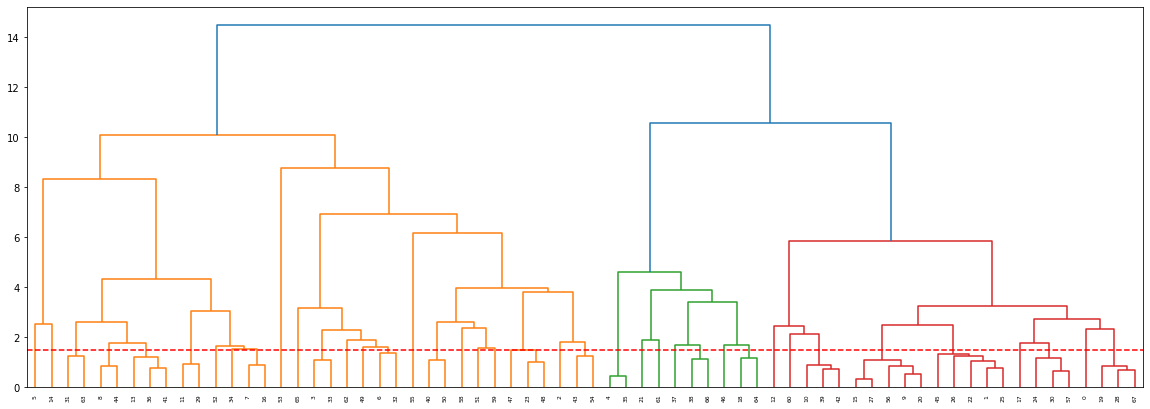

In [1186]:

fig,ax = plt.subplots(figsize=(20,7))
dendrogram_2021 = sch.dendrogram(sch.linkage(data2021_std, method='ward'),ax=ax)
plt.axhline(y=1.5, color='r', linestyle='--')

In [1187]:

hc_2021 = AgglomerativeClustering(n_clusters=40, affinity = 'euclidean', linkage = 'ward')
y_hc_2021 = hc_2021.fit_predict(data2021_std)

In [1188]:

cluster2021 = completedataset2021.copy()
cluster2021['cluster2021'] = pd.Series(y_hc_2021, index=completedataset2021.index)

In [1189]:

data_2021_clustered_2021 = cluster2021[['returnpct','volatility','cluster2021']].groupby('cluster2021').sum()
data_2021_clustered_2021['returnsTopricevol'] = data_2021_clustered_2021['returnpct'] / data_2021_clustered_2021['volatility']

In [1190]:

num_of_stocks_2021 = []
for n in range(len(set(y_hc_2021))):
    num_of_stocks_2021.append(cluster2021['cluster2021'][cluster2021['cluster2021'] == n].count())

data_2021_clustered_2021['stockincluster'] = num_of_stocks_2021

In [1191]:
data_2021_clustered_2021.sort_values(by='returnsTopricevol',ascending=False)

,returnpct,volatility,returnsTopricevol,stockincluster
cluster2021,,,,
33,49.180329,0.516846,95.154750,1
13,58.372655,0.796418,73.293995,2
30,26.143784,0.580915,45.004485,1
18,121.701089,2.811732,43.283312,3
6,385.490505,9.920772,38.856905,3
3,55.569869,2.173889,25.562426,2
31,113.548387,5.525152,20.551180,1
23,57.657652,2.967616,19.428949,1
9,5.840459,0.378063,15.448379,2


In [1192]:

return2022['cluster2021'] = pd.Series(y_hc_2021, index=return2022.index) 
data_2022_clustered_2021 = return2022.groupby('cluster2021').sum() 
data_2022_clustered_2021['stockincluster'] = pd.Series(num_of_stocks_2021, index=data_2022_clustered_2021.index)
data_2022_clustered_2021 = data_2022_clustered_2021[['returnpct','stockincluster']] 

In [1531]:
cluster2021[(return2022['cluster2021'] == 13)| (return2022['cluster2021'] == 30) | (return2022['cluster2021'] == 33) |(return2022['cluster2021'] == 18)| (return2022['cluster2021'] == 6)].sort_values(by='cluster2021')

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2020,cluster2021
FORTH,245.454528,5.251007,0.77,0.0151,0.036321,13.99,1.017452,0.703014,3.640354,0,6
HMPRO,5.035977,0.552599,0.41,0.0207,0.028276,12.28,0.922456,0.609287,1.559425,3,6
SYNEX,135.000000,4.117165,1.02,0.0148,0.027945,10.53,1.375014,0.650833,1.871718,3,6
KTB,18.750004,0.709346,1.54,0.0208,0.116667,1.51,0.066999,0.894816,8.840044,6,13
TTB,39.622651,0.087072,0.11,0.0305,0.074830,1.46,0.136524,0.880151,7.343886,6,13
CPF,-12.280702,1.714380,1.56,0.0394,0.061176,4.15,1.061896,0.659258,2.583120,0,18
GUNKUL,118.750001,0.936924,0.25,0.0321,0.044643,7.70,0.835780,0.687346,2.225499,0,18
WHA,15.231789,0.160428,0.17,0.0285,0.048295,5.68,0.957458,0.588861,1.593108,3,18
AP,26.143784,0.580915,1.44,0.0471,0.150785,9.51,4.096120,0.463268,0.862641,1,30
CHG,49.180329,0.516846,0.38,0.0137,0.103825,63.25,2.670464,0.256759,0.357874,2,33


In [1437]:
return2022[(return2022['cluster2021'] == 13)| (return2022['cluster2021'] == 30) | (return2022['cluster2021'] == 33) |(return2022['cluster2021'] == 18)| (return2022['cluster2021'] == 6)].sort_values(by='cluster2021')

,returnpct,cluster2021
FORTH,76.401872,6
HMPRO,-0.675678,6
SYNEX,-50.144925,6
KTB,30.370373,13
TTB,-6.802723,13
CPF,-11.111111,18
GUNKUL,-11.965809,18
WHA,8.426965,18
AP,6.806279,30
CHG,-2.793293,33


In [1424]:
return2022['returnpct'][(return2022['cluster2021'] == 13 )| (return2022['cluster2021'] == 30) | (return2022['cluster2021'] == 33) |(return2022['cluster2021'] == 18)| (return2022['cluster2021'] == 6)].sum()

38.51194953592169

In [1440]:
return2022.sort_values(by='returnpct',ascending=False).head()

,returnpct,cluster2021
FORTH,76.401872,6
BH,56.028369,17
PTTEP,54.811715,8
BDMS,31.696431,7
KTB,30.370373,13


In [1524]:
#หุ้นที่ติดลบในปี 2565
return2022['returnpct'][return2022['returnpct'] < 0].sort_values()

SYNEX    -50.144925
KCE      -46.045198
HANA     -42.285714
MTC      -38.559322
STA      -37.333336
SAWAD    -30.522088
COM7      -23.58209
GPSC     -23.229462
PTTGC    -23.109244
IRPC     -23.076925
STEC     -21.333332
TTA      -21.287134
CBG      -20.588235
TQM      -19.685039
OSP      -19.565217
BLA      -19.333333
BCPG     -18.333332
ADVANC   -16.666667
ORI      -12.931034
PTT           -12.5
SCC      -12.403101
DTAC     -12.021858
GUNKUL   -11.965809
CPF      -11.111111
RATCH     -9.944751
AMATA     -9.478673
BGRIM     -8.641975
INTUCH       -8.125
THANI     -8.071752
JMT       -7.913669
MEGA      -7.179487
TASCO     -7.142863
TTB       -6.802723
PTG       -5.263159
CKP       -3.366338
EGCO      -3.116147
KTC       -2.916667
IVL       -2.873563
CHG       -2.793293
QH        -2.631576
TRUE      -2.542371
EA        -2.313625
TISCO     -2.030457
KBANK      -1.37457
HMPRO     -0.675678
Name: returnpct, dtype: object

In [ ]:
data_2022_clustered_2021.sort_values(by='returnpct',ascending=False)

In [1419]:

porttop_2021 = cluster2021.copy()
porttop_2021['returnsTopricevol'] = cluster2021['returnpct'] / cluster2021['volatility'] 
porttop_2021 = porttop_2021.sort_values(by='returnpct',ascending=False).head(20) 
porttop_2021 = porttop_2021[(porttop_2021['currentRatio'] > 1)]
porttop_2021 = porttop_2021.sort_values(by='earningsYield',ascending=False).head(10)
returns2022_top2021 = return2022.loc[porttop_2021.index]

In [1420]:
returns2022_top2021

,returnpct,cluster2021
TTA,-21.287134,15
BCH,1.538458,21
ORI,-12.931034,3
CHG,-2.793293,33
BLA,-19.333333,23
MEGA,-7.179487,2
INTUCH,-8.125,4
FORTH,76.401872,6
SYNEX,-50.144925,6
COM7,-23.58209,31


In [1421]:
returns2022_top2021['returnpct'].sum()

-67.43596657735773

In [1496]:
df_result = pd.DataFrame(columns=[['Cluster portfolio(return%)','Example portfolio(return%)','stock counts']],index=[['2020','2021','2022']])
df_result

,Cluster portfolio(return%),Example portfolio(return%),stock counts
2020,NaN,NaN,NaN
2021,NaN,NaN,NaN
2022,NaN,NaN,NaN


#                                                                       ตารางสรุปผล

In [1497]:
df_result.loc['2021',['Cluster portfolio(return%)']] = returns_cluster_21_20[0].round(2)
df_result.loc['2020',['Cluster portfolio(return%)']] = returns_cluster_20_19[0].round(2)
df_result.loc['2022',['Cluster portfolio(return%)']] = return2022['returnpct'][(return2022['cluster2021'] == 13 )| (return2022['cluster2021'] == 30) | (return2022['cluster2021'] == 33) 
|(return2022['cluster2021'] == 18)| (return2022['cluster2021'] == 6)].sum().round(2)


In [1498]:
df_result.loc['2022',['Example portfolio(return%)']] = returns2022_top2021['returnpct'].sum().round(2)
df_result.loc['2021',['Example portfolio(return%)']] = returns2021_top2020['returnpct'].sum().round(2)
df_result.loc['2020',['Example portfolio(return%)']] = returns_top['returnpct'].sum().round(2)

In [1501]:
df_result.loc['2020',['stock counts']] = 11
df_result.loc['2021',['stock counts']] = 10
df_result.loc['2022',['stock counts']] = 10

In [1502]:
df_result

,Cluster portfolio(return%),Example portfolio(return%),stock counts
2020,172.07,94.96,11
2021,692.74,619.19,10
2022,38.51,-67.44,10


# พอร์ต 2020

In [1506]:
completedataset2020[(completedataset2020['cluster2019'] == 21 )| (completedataset2020['cluster2019'] == 8) | (completedataset2020['cluster2019'] == 10) |
(completedataset2020['cluster2019'] == 26) |(completedataset2020['cluster2019'] == 18)].sort_values(by='returnpct', ascending=False)

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2019
TQM,101.526718,13.361828,2.34,0.0130,0.017398,18.92,3.488374,0.334737,0.503166,8
JMT,77.230053,6.895875,1.15,0.0147,0.031944,12.48,1.487352,0.596750,1.487729,10
COM7,59.000000,4.318826,1.24,0.0205,0.031795,20.43,1.322981,0.579565,1.385120,21
MEGA,32.110092,5.351814,1.60,0.0201,0.044755,15.32,1.794122,0.396121,0.657968,8
CHG,-3.846150,0.130627,0.08,0.0203,0.032520,17.76,1.233658,0.323766,0.498849,18
OSP,-11.111111,3.553484,1.17,0.0282,0.032958,16.30,2.014193,0.252419,0.339491,18
HMPRO,-13.207544,1.344021,0.39,0.0277,0.028467,12.30,0.767992,0.615530,1.600981,21
BCPG,-14.371260,1.804589,0.92,0.0341,0.064789,6.26,3.087681,0.559759,1.275378,10
TASCO,-15.639816,3.657395,2.28,0.0856,0.130286,19.25,1.877883,0.295945,0.425535,26
BDMS,-19.619046,2.103236,0.45,0.0264,0.021635,8.36,2.674854,0.327729,0.507194,18


In [1508]:
returns_top.sort_values(by='returnpct',ascending=False)

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2019
TQM,101.526718,13.361828,2.34,0.0130,0.017398,18.92,3.488374,0.334737,0.503166,8
COM7,59.000000,4.318826,1.24,0.0205,0.031795,20.43,1.322981,0.579565,1.385120,21
KTC,48.407643,7.010144,2.07,0.0148,0.034790,9.42,2.738079,0.736749,2.959879,13
SAWAD,-1.102941,9.760329,3.32,0.0213,0.050494,14.13,3.843147,0.537183,1.265006,2
CHG,-3.846150,0.130627,0.08,0.0203,0.032520,17.76,1.233658,0.323766,0.498849,18
MTC,-6.225681,7.441874,2.46,0.0051,0.041695,11.98,3.245688,0.732173,2.733748,13
OSP,-11.111111,3.553484,1.17,0.0282,0.032958,16.30,2.014193,0.252419,0.339491,18
GPSC,-12.173913,10.347244,2.66,0.0144,0.036068,5.31,1.969541,0.564136,1.407065,11
TASCO,-15.639816,3.657395,2.28,0.0856,0.130286,19.25,1.877883,0.295945,0.425535,26
RATCH,-22.939068,6.892702,4.34,0.0453,0.081887,7.41,2.687827,0.460266,0.852775,1


# พอร์ต 2021

In [1513]:
completedataset2021[(completedataset2021['cluster2020'] == 10 )| (completedataset2021['cluster2020'] == 12) | (completedataset2021['cluster2020'] == 36) |(completedataset2021['cluster2020'] == 30)|
(completedataset2021['cluster2020'] == 33)|(completedataset2021['cluster2020'] == 37) |(completedataset2021['cluster2020'] == 15)].sort_values(by='returnpct',ascending=False)

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2020
FORTH,245.454528,5.251007,0.77,0.0151,0.036321,13.99,1.017452,0.703014,3.640354,30
SYNEX,135.000000,4.117165,1.02,0.0148,0.027945,10.53,1.375014,0.650833,1.871718,36
COM7,113.548387,5.525152,2.19,0.0122,0.026789,25.67,1.218964,0.667992,2.018026,37
JMT,87.500000,6.890693,1.29,0.0091,0.018832,9.29,2.819938,0.319536,0.470708,33
TTA,50.393706,3.830547,2.12,0.0021,0.221990,12.09,2.834695,0.373502,0.684052,10
BCH,47.101442,3.552220,2.75,0.0114,0.136816,44.30,1.725549,0.457786,0.930538,33
STA,19.047619,6.802107,10.32,0.0726,0.332903,28.46,2.200138,0.432024,1.060584,12
WHA,15.231789,0.160428,0.17,0.0285,0.048295,5.68,0.957458,0.588861,1.593108,36
HMPRO,5.035977,0.552599,0.41,0.0207,0.028276,12.28,0.922456,0.609287,1.559425,33
TQM,-25.576923,3.764352,1.48,0.0222,0.015258,23.43,2.727909,0.321389,0.532740,15


In [1512]:
returns2021_top2020.sort_values(by='returnpct',ascending=False)

,returnpct,volatility,eps,dividendYeild,earningsYield,roa,currentRatio,debtToAssets,debtToEquity,cluster2020
SYNEX,135.000000,4.117165,1.02,0.0148,0.027945,10.53,1.375014,0.650833,1.871718,36
HANA,120.370370,14.100969,1.92,0.0158,0.021695,6.05,4.360866,0.172149,0.207948,39
COM7,113.548387,5.525152,2.19,0.0122,0.026789,25.67,1.218964,0.667992,2.018026,37
JMT,87.500000,6.890693,1.29,0.0091,0.018832,9.29,2.819938,0.319536,0.470708,33
BLA,57.657652,2.967616,1.87,0.0062,0.050201,1.10,2.452020,0.861826,6.237281,29
ORI,47.435894,1.305082,1.30,0.0434,0.115044,13.14,2.375414,0.549698,1.302439,6
MEGA,33.333333,6.251581,2.23,0.0178,0.044158,18.54,1.916381,0.395321,0.655591,16
STA,19.047619,6.802107,10.32,0.0726,0.332903,28.46,2.200138,0.432024,1.060584,12
SPALI,8.133975,0.868807,3.63,0.0441,0.159912,13.38,2.737053,0.399062,0.677590,7
KTC,-2.834008,7.424276,2.28,0.0149,0.038481,9.75,3.306183,0.697283,2.324708,9


# พอร์ต 2022

In [1514]:
return2022[(return2022['cluster2021'] == 13)| (return2022['cluster2021'] == 30) | (return2022['cluster2021'] == 33) 
|(return2022['cluster2021'] == 18)| (return2022['cluster2021'] == 6)].sort_values(by='returnpct',ascending=False)

,returnpct,cluster2021
FORTH,76.401872,6
KTB,30.370373,13
WHA,8.426965,18
AP,6.806279,30
HMPRO,-0.675678,6
CHG,-2.793293,33
TTB,-6.802723,13
CPF,-11.111111,18
GUNKUL,-11.965809,18
SYNEX,-50.144925,6


In [1516]:
returns2022_top2021.sort_values(by='returnpct',ascending=False)

,returnpct,cluster2021
FORTH,76.401872,6
BCH,1.538458,21
CHG,-2.793293,33
MEGA,-7.179487,2
INTUCH,-8.125,4
ORI,-12.931034,3
BLA,-19.333333,23
TTA,-21.287134,15
COM7,-23.58209,31
SYNEX,-50.144925,6
